# (top)

 * move Gaussian constraints out (multiply the simul pdf by them, not each component
 * get correct expectation values for all parameters
 * separate high mass and low mass categories, only apply the desired one
 * make sure bkg from Leo's file is the correct thing to fit

In [1]:
import ROOT
import ROOT.RooFit as rf
#import rootnotes
import numpy as np
import matplotlib.pyplot as plt
from root_numpy import array2tree, hist2array
from rootpy.io import root_open
%matplotlib inline

Welcome to JupyROOT 6.08/02


Import compile Double Sided Crystal Ball function

In [2]:
from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "../56_Hbbyy/inc/HggTwoSidedCBPdf.h"')
gSystem.Load('../56_Hbbyy/libDH.so')

0

In [3]:
#c1=rootnotes.default_canvas()
#%jsroot on

In [4]:
# Declare observable x: myy, the diphoton mass
myy = ROOT.RooRealVar("myy", "m_yy", 105, 160)

Get histograms from Leo's file

In [5]:
from copy import deepcopy

def _add(h1, h2):
    res = deepcopy(h1)
    res.add(h2)
    return res

In [6]:
f = root_open('combined_backgrounds_20170201.root')
histos_bkg_myy = {k.GetName(): f.Get(k.GetName()) for k in f.GetListOfKeys() if 'm_yy_' in k.GetName()}

In [7]:
myyarglist = ROOT.RooArgList(myy)
for k, v in histos_bkg_myy.iteritems():
    short_k = k.replace('m_yy_', '').replace('tightIsolated_bkg_', '')
    exec ("{} = {}".format(
        short_k,
        'ROOT.RooDataHist("{k}", "{k}", myyarglist, v)'.format(k=k)
    )) 

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(m_yy_highMass_1tag_tightIsolated_bkg_non_Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(m_yy_highMass_2tag_tightIsolated_bkg_single_Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(m_yy_lowMass_2tag_tightIsolated_bkg_non_Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(m_yy_lowMass_0tag_tightIsolated_bkg_single_Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(

In [8]:
# Create a binned dataset that imports contents of TH1 and associates its contents to observable 'x'
# 0 tag: nonHiggs bkg + single Higgs bkg
# 1,2 tags: nonHiggs bkg + single Higgs bkg + diHiggs signal

# dh_bkg_noH_0tag_highmass = ROOT.RooDataHist(
#     "0tag_highmass_bkg_nonHiggs", "0tag_highmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs'])
# dh_bkg_noH_1tag_highmass = ROOT.RooDataHist(
#     "1tag_highmass_bkg_nonHiggs", "1tag_highmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_1tag_tightIsolated_bkg_non_Higgs'])
# dh_bkg_noH_2tag_highmass = ROOT.RooDataHist(
#     "2tag_highmass_bkg_nonHiggs", "2tag_highmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_2tag_tightIsolated_bkg_non_Higgs'])
# dh_bkg_1H_0tag_highmass = ROOT.RooDataHist(
#     "0tag_highmass_bkg_1Higgs", "0tag_highmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs'])
# dh_bkg_1H_1tag_highmass = ROOT.RooDataHist(
#     "1tag_highmass_bkg_1Higgs", "1tag_highmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_1tag_tightIsolated_bkg_single_Higgs'])
# dh_bkg_1H_2tag_highmass = ROOT.RooDataHist(
#     "2tag_highmass_bkg_1Higgs", "2tag_highmass_bkg_1Higgs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_2tag_tightIsolated_bkg_single_Higgs'])

# dh_bkg_noH_0tag_lowmass = ROOT.RooDataHist(
#     "0tag_lowmass_bkg_nonHiggs", "0tag_lowmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_non_Higgs'])
# dh_bkg_noH_1tag_lowmass = ROOT.RooDataHist(
#     "1tag_lowmass_bkg_nonHiggs", "1tag_lowmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_non_Higgs'])
# dh_bkg_noH_2tag_lowmass = ROOT.RooDataHist(
#     "2tag_lowmass_bkg_nonHiggs", "2tag_lowmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_non_Higgs'])
# dh_bkg_1H_0tag_lowmass = ROOT.RooDataHist(
#     "0tag_lowmass_bkg_1Higgs", "0tag_lowmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_single_Higgs'])
# dh_bkg_1H_1tag_lowmass = ROOT.RooDataHist(
#     "1tag_lowmass_bkg_1Higgs", "1tag_lowmass_bkg_nonHiggs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_single_Higgs'])
# dh_bkg_1H_2tag_lowmass = ROOT.RooDataHist(
#     "2tag_lowmass_bkg_1Higgs", "2tag_lowmass_bkg_1Higgs",
#     ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_single_Higgs'])

^ are these the full backgrounds with templates? or only the sharpa ones?

Fit to the 0 tag category to get the parameters:

In [9]:
# -- create a workspace
w = ROOT.RooWorkspace('w')

In [10]:
# -- import the variable myy created above
getattr(w,'import')(myy)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::myy


In [11]:
# - build model with nuisance params, global observable, categories, ...
# - do fit on MC, fix fit function params 
# - build two model configs, one for B, one for S+B
# - make two asimov datasets for mu=0, mu=1 (?)
# - use hypothesis test inverter with asymptotic calculator to get CL

Build generic background PDF with $\texttt{epoly2}$ function: $$PDF_\text{bkg} = exp(a_0 + a_1x + a_2x^2)$$
Set $a_0=1$ and include the normalization factor later by extending the PDF. 

In [12]:
# -- epoly background (b = e^(a0+a1*x+a2*x^2))
w.factory("PolyVar::bkg_exponent(myy,{a0[1], a1[-100, 100], a2[-100, 100]})")
w.factory("Exponential::bkg_pdf(bkg_exponent,1)")
w.var('a0').setConstant(True)

In [13]:
# -- old exponential background (b = e^(cx))
# c0_bkg = ROOT.RooRealVar('c0_bkg', 'coefficient c0 of exponential bkg fit', -100, 100)
# bkg_pdf = ROOT.RooExponential('bkg_pdf', 'exponential bkg pdf', myy, c0_bkg)

Build generic signal PDF with Double Sided CB function:

In [14]:
# -- define single-Higgs bkg fit function (Double Sided Crystal Ball)
m0_cb = ROOT.RooRealVar('m0_cb','m0_cb', 125, 105, 160)
sigma_cb = ROOT.RooRealVar('sigma_cb','sigma_cb', 5, 0, 20)
alphaLo_cb = ROOT.RooRealVar('alphaLo_cb','alphaLo_cb', 0, 5)
nLo_cb = ROOT.RooRealVar('nLo_cb','nLo_cb', 0, 10)
alphaHi_cb = ROOT.RooRealVar('alphaHi_cb','alphaHi_cb', 0, 5)
nHi_cb = ROOT.RooRealVar('nHi_cb','nHi_cb', 0, 10)

# -- double sided crystal ball
dscb_pdf = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf', 'Double Sided Crystal Ball',
    myy,
    m0_cb,
    sigma_cb,
    alphaLo_cb,
    nLo_cb,
    alphaHi_cb,
    nHi_cb
)

In [15]:
# -- import the DSCB function into the workspace
getattr(w,'import')(dscb_pdf)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_pdf
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaLo_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nLo_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaHi_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nHi_cb


Fit the non-Higgs background function to the high mass and low mass binned data individually to find the values of $a_1$ and $a_2$ that will be applied to the corresponding 1 and 2 tag categories.

In [16]:
# low mass fit
r = w.pdf("bkg_pdf").fitTo(lowMass_0tag_non_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())

[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a1           0.00000e+00  2.00000e+01   -1.00000e+02  1.00000e+02
     2 a2           0.00000e+00  2.00000e+01   -1.00000e+02  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
[#0] WARNING:I

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_lowMass_0tag_tightIsolated_bkg_non_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


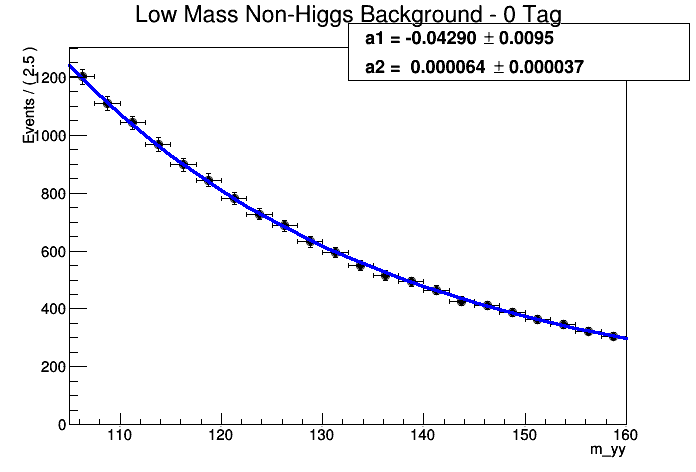

In [17]:
c = ROOT.TCanvas()
frame = myy.frame()
lowMass_0tag_non_Higgs.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Non-Higgs Background - 0 Tag")
c.Draw()

Save a snapshot of the values of $a_1$ and $a_2$ that were found by fitting the low mass non-Higgs background in the 0 tag category. These values will be frozen for the 1 and 2 tag categories.

In [18]:
w.defineSet("params_epoly2", "a1,a2")
w.saveSnapshot("lowmass_epoly2",w.set("params_epoly2"), ROOT.kTRUE)

True

Redo the fit for the high mass category:

In [19]:
# high mass fit
r = w.pdf("bkg_pdf").fitTo(highMass_0tag_non_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())

[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a1          -4.29004e-02  9.51067e-03   -1.00000e+02  1.00000e+02
     2 a2           6.35874e-05  3.65609e-05   -1.00000e+02  1.00000e+02
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PRINT           1
 **********
 **********
 **   17 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   18 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=4391.26 F

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


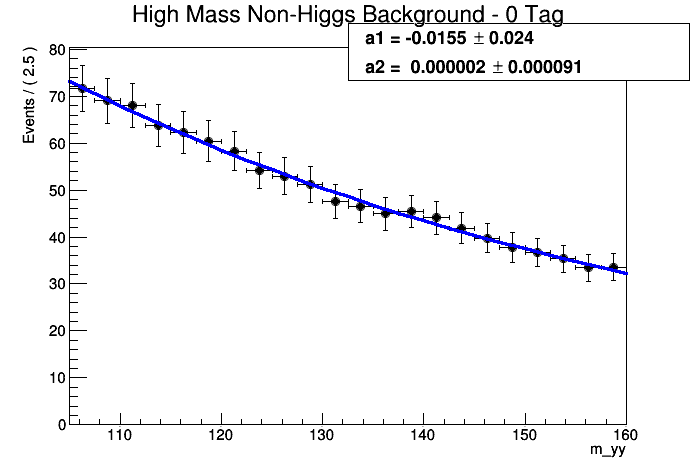

In [20]:
c = ROOT.TCanvas()
frame = myy.frame()
highMass_0tag_non_Higgs.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Non-Higgs Background - 0 Tag")
c.Draw()

In [21]:
w.saveSnapshot("highmass_epoly2",w.set("params_epoly2"), ROOT.kTRUE)

True

In [22]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(a0,a1,a2,alphaHi_cb,alphaLo_cb,m0_cb,myy,nHi_cb,nLo_cb,sigma_cb)

p.d.f.s
-------
RooExponential::bkg_pdf[ x=bkg_exponent c=1 ] = 0.364423
HggTwoSidedCBPdf::dscb_pdf[ m=myy m0=m0_cb sigma=sigma_cb alphaLo=alphaLo_cb nLo=nLo_cb alphaHi=alphaHi_cb nHi=nHi_cb ] = 0.324652

functions
--------
RooPolyVar::bkg_exponent[ x=myy coefList=(a0,a1,a2) ] = -1.00944

parameter snapshots
-------------------
lowmass_epoly2 = (a1=-0.0429004 +/- 0.00951067,a2=6.35874e-05 +/- 3.65609e-05)
highmass_epoly2 = (a1=-0.0154718 +/- 0.0238383,a2=2.31129e-06 +/- 9.08521e-05)

named sets
----------
params_epoly2:(a1,a2)



The cells below have been commented out. They tested the idea of doing a simultaneous fit in the high and low mass categories, which is of course a bad idea given that the two have different shapes.

In [23]:
# -- individual fit to single higgs bkg
#w.pdf("dscb_pdf").fitTo(dh_bkg_1H_0tag_lowmass, rf.SumW2Error(ROOT.kTRUE))

In [24]:
#w.factory("tag0cat[tag0low,tag0high]")

In [25]:
# from copy import deepcopy
# noH_0tag_combo = ROOT.RooDataHist("combData", "combined data", ROOT.RooArgList(myy),
#                             rf.Index(w.cat("tag0cat")),
#                             rf.Import("tag0low", dh_bkg_noH_0tag_lowmass),
#                             rf.Import("tag0high", dh_bkg_noH_0tag_highmass))


In [26]:
# #w.factory("SIMUL:noH_0tag_jointmodel(tag0cat,tag0low=bkg_pdf,tag0high=bkg_pdf)")
# w.factory("SIMUL:noH_0tag_jointmodel(\
#     tag0cat,\
#     tag0low = ExtendPdf:pdf_low(bkg_pdf, n_low[100, 0, 100000]),\
#     tag0high = ExtendPdf:pdf_high(bkg_pdf, n_high[100, 0, 100000]))"
# )
# #ExtendPdf:pdf(gaus, nevt[100,0,100000])
# # Simultaneous p.d.f.s are constructed with SIMUL( index, state1=pdf1, state2=pdf2,...)
# # w->factory("SIMUL::smodel( c[A=0,B=1], A=Gaussian::gs(x,m,s[1]), B=Landau::ls(x,0,1) )")

In [27]:
# c1 = ROOT.TCanvas()
# plot1 = myy.frame()
# plot2 = myy.frame()

# r = w.pdf("noH_0tag_jointmodel").fitTo(noH_0tag_combo, rf.Save(), rf.SumW2Error(ROOT.kTRUE))
# r.Print()

# #dh_bkg_noH_0tag_lowmass.plotOn(plot1, rf.MarkerColor(ROOT.kRed))
# noH_0tag_combo.plotOn(plot1, ROOT.RooFit.Cut("tag0cat==tag0cat::tag0low"))
# w.pdf("noH_0tag_jointmodel").plotOn(plot1, rf.ProjWData(noH_0tag_combo), rf.Slice(w.cat("tag0cat"),"tag0low"))

# #dh_bkg_noH_0tag_highmass.plotOn(plot2)
# noH_0tag_combo.plotOn(plot2, ROOT.RooFit.Cut("tag0cat==tag0cat::tag0high"))
# w.pdf("noH_0tag_jointmodel").plotOn(plot2, rf.ProjWData(noH_0tag_combo), rf.Slice(w.cat("tag0cat"),"tag0high"))

In [28]:
# plot1.Draw()
# c1.Draw()

In [29]:
# plot2.Draw()
# c1.Draw()

In [30]:
# --> conclusion: fit high and low mass separately, not simultaneously

In [31]:
# # -- generate fake data and re-fit it
# data = w.pdf("noH_0tag_jointmodel").generate(ROOT.RooArgSet(myy,w.cat("tag0cat")))
# data.SetName("data")
# getattr(w,'import')(data)
# data.Print()

In [32]:
# c = ROOT.TCanvas()
# plot1 = myy.frame(ROOT.RooFit.Title("Channel 1"))
# plot2 = myy.frame(ROOT.RooFit.Title("Channel 2"))
# data.plotOn(plot1,ROOT.RooFit.Cut("tag0cat==tag0cat::tag0low"))
# data.plotOn(plot2,ROOT.RooFit.Cut("tag0cat==tag0cat::tag0high"))
# r = w.pdf("noH_0tag_jointmodel").fitTo(data, rf.SumW2Error(ROOT.kTRUE), rf.Save())
# w.pdf("noH_0tag_jointmodel").plotOn(plot1,ROOT.RooFit.ProjWData(data),ROOT.RooFit.Slice(w.cat("tag0cat"),"tag0low"))
# w.pdf("noH_0tag_jointmodel").plotOn(plot2,ROOT.RooFit.ProjWData(data),ROOT.RooFit.Slice(w.cat("tag0cat"),"tag0high"))
# c.Divide(1,2)
# c.cd(1)
# plot1.Draw()
# c.cd(2)
# plot2.Draw()
# c.Draw()

Check how well these fit the 1 and 2 tag categories:

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_highMass_1tag_tightIsolated_bkg_non_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_highMass_2tag_tightIsolated_bkg_non_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


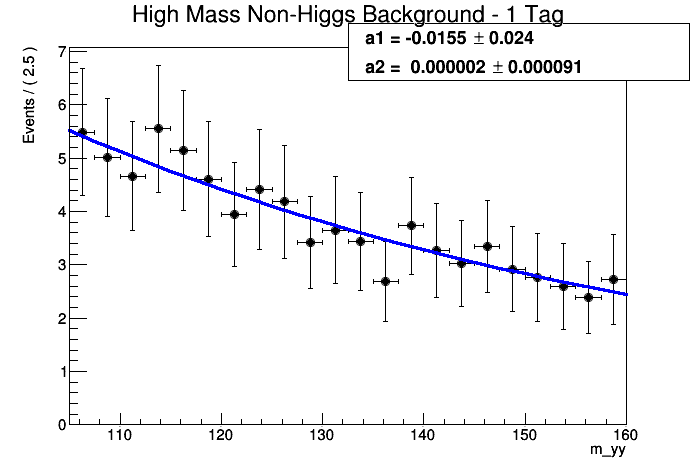

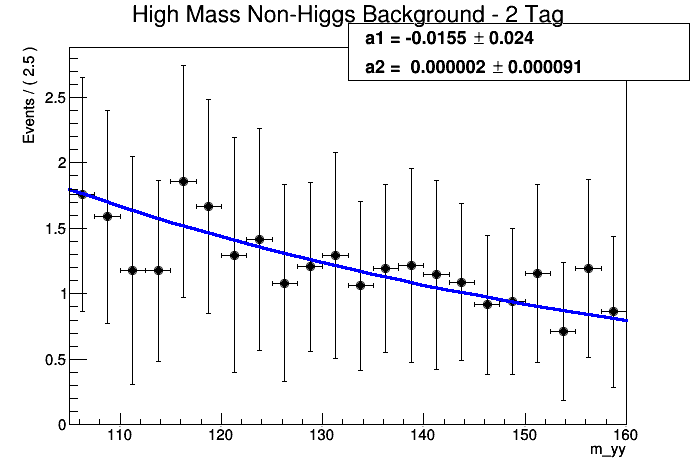

In [33]:
# -- high mass (keep a1 and a2 values we just found)
c = ROOT.TCanvas()
frame = myy.frame()
highMass_1tag_non_Higgs.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Non-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
highMass_2tag_non_Higgs.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Non-Higgs Background - 2 Tag")
c1.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_lowMass_1tag_tightIsolated_bkg_non_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_lowMass_2tag_tightIsolated_bkg_non_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


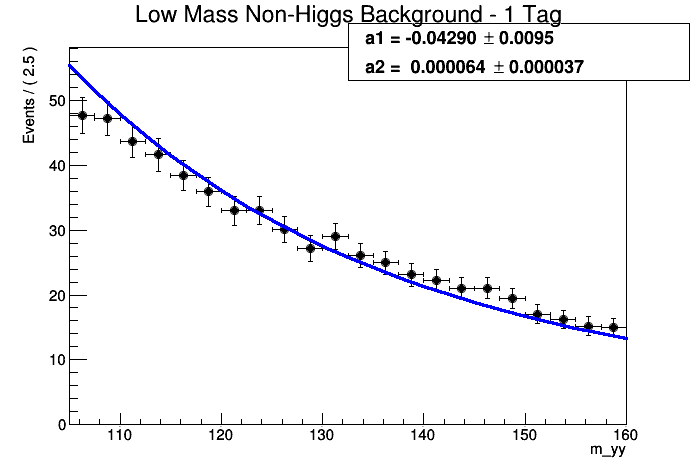

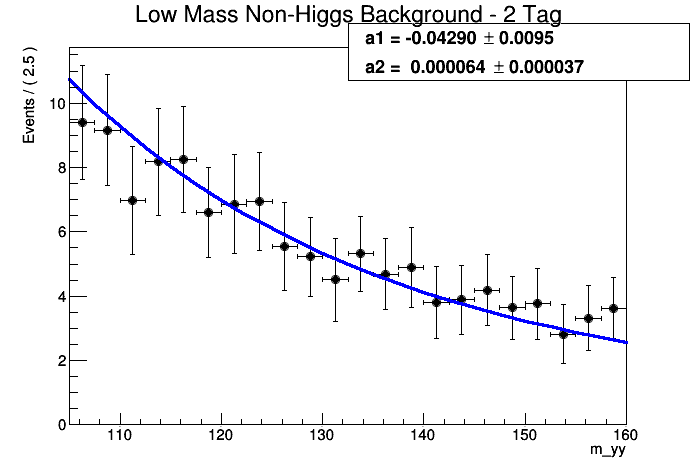

In [34]:
# -- low mass (restore previous snapshot)
w.loadSnapshot("lowmass_epoly2")
c = ROOT.TCanvas()
frame = myy.frame()
lowMass_1tag_non_Higgs.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Non-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
lowMass_2tag_non_Higgs.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Non-Higgs Background - 2 Tag")
c1.Draw()

These look less than ideal. How can we quantify this?

Do the same for the DSCB function that represents the single-Higgs background. Fit it in the 0 tag category (high mass and low mass separately) and then check how that fits the 1 and 2 tag categories. The difference here is that we will only fix the $\alpha$ and $n$ parameters, while we we let $m_0$ and $\sigma$ float with every fit.

In [35]:
# low mass fit
r = w.pdf("dscb_pdf").fitTo(lowMass_0tag_single_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaHi_cb   2.50000e+00  5.00000e-01    0.00000e+00  5.00000e+00
     2 alphaLo_cb   2.50000e+00  5.00000e-01    0.00000e+00  5.00000e+00
     3 m0_cb        1.25000e+02  5.50000e+00    1.05000e+02  1.60000e+02
     4 nHi_cb       5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     5 nLo_cb       5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     6 sigma_cb     5.00000e+00  2.00000e+00    0.00000e+00  2.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        3000           1
 *********

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_lowMass_0tag_tightIsolated_bkg_single_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


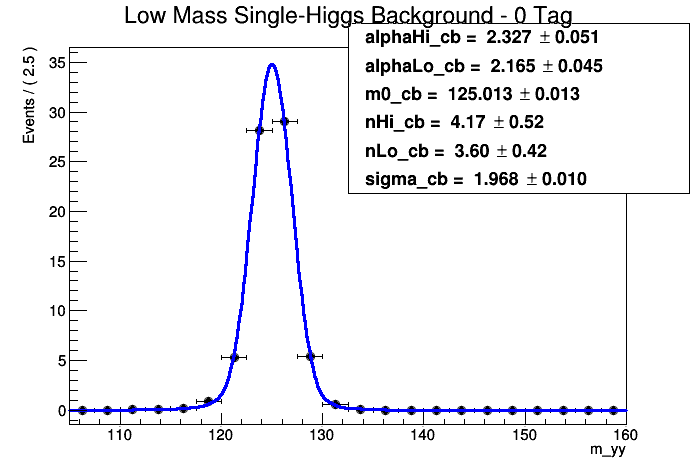

In [36]:
c = ROOT.TCanvas()
frame = myy.frame()
lowMass_0tag_single_Higgs.plotOn(frame)
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)
frame.Draw()
frame.SetTitle("Low Mass Single-Higgs Background - 0 Tag")
c.Draw()

In [37]:
w.defineSet("params_dscb", "alphaHi_cb,alphaLo_cb,nHi_cb,nLo_cb")
w.saveSnapshot("lowmass_cb", w.set("params_dscb"))

True

In [38]:
w.pdf("dscb_pdf").fitTo(highMass_0tag_single_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())

<ROOT.RooFitResult object ("fitresult_dscb_pdf_m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs") at 0x7fc4a069e950>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaHi_cb   2.32694e+00  5.14366e-02    0.00000e+00  5.00000e+00
     2 alphaLo_cb   2.16478e+00  4.49161e-02    0.00000e+00  5.00000e+00
     3 m0_cb        1.25013e+02  1.27139e-02    1.05000e+02  1.60000e+02
     4 nHi_cb       4.16611e+00  5.22503e-01    0.00000e+00  1.00000e+01
     5 nLo_cb       3.59579e+00  4.18940e-01    0.00000e+00  1.00000e+01
     6 sigma_cb     1.96760e+00  1.00634e-02    0.00000e+00  2.00000e+01
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PRINT           1
 **********
 **********
 **   17 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   18 **MIGRAD        3000           1
 *********

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


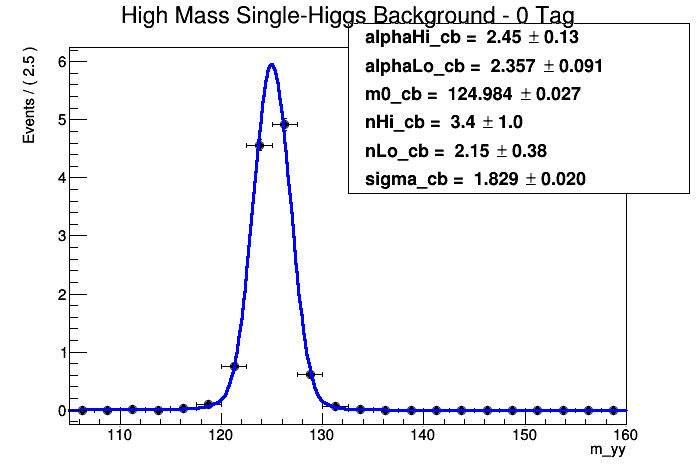

In [39]:
c = ROOT.TCanvas()
frame = myy.frame()
highMass_0tag_single_Higgs.plotOn(frame)
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)
frame.Draw()
frame.SetTitle("High Mass Single-Higgs Background - 0 Tag")
c.Draw()

In [40]:
w.saveSnapshot("highmass_cb", w.set("params_dscb"))

True

In [41]:
w.loadSnapshot("highmass_cb")

True

In [42]:
def wrap_iter(it):
    elem = it.Next()
    while elem:
        yield elem
        elem = it.Next()

In [43]:
# -- setting parameters to constant
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())]

[('alphaHi_cb', None),
 ('alphaLo_cb', None),
 ('nHi_cb', None),
 ('nLo_cb', None)]

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_highMass_1tag_tightIsolated_bkg_single_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24984e+02  2.67597e-02    1.05000e+02  1.60000e+02
     2 sigma_cb     1.82905e+00  2.04158e-02    0.00000e+00  2.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEG

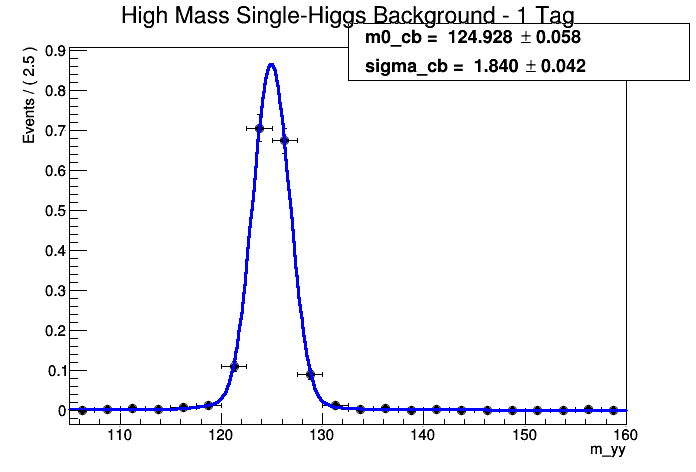

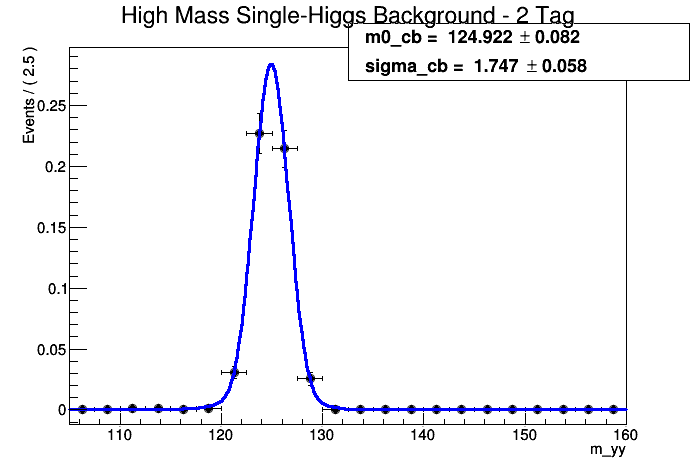

In [44]:
# -- high mass (keep a1 and a2 values we just found)
c = ROOT.TCanvas()
frame = myy.frame()
highMass_1tag_single_Higgs.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(highMass_1tag_single_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Single-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
highMass_2tag_single_Higgs.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(highMass_2tag_single_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Single-Higgs Background - 2 Tag")
c1.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(m_yy_lowMass_1tag_tightIsolated_bkg_single_Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   25 **SET PRINT           1
 **********
 **********
 **   26 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24922e+02  8.24031e-02    1.05000e+02  1.60000e+02
     2 sigma_cb     1.74669e+00  5.75389e-02    0.00000e+00  2.00000e+01
 **********
 **   27 **SET ERR         0.5
 **********
 **********
 **   28 **SET PRINT           1
 **********
 **********
 **   29 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   30 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY

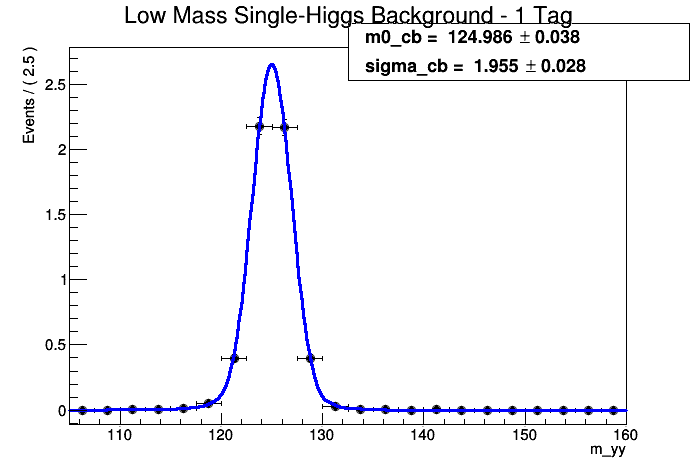

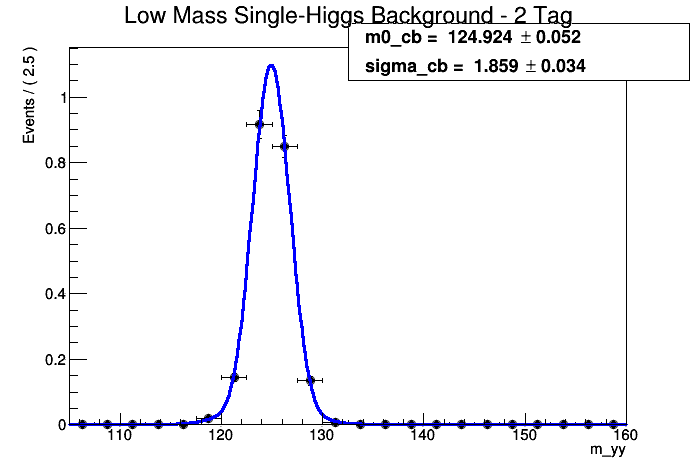

In [45]:
# -- low mass (load previous snapshot)
w.loadSnapshot("lowmass_cb")
# -- setting parameters to constant
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())]

c = ROOT.TCanvas()
frame = myy.frame()
lowMass_1tag_single_Higgs.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(lowMass_1tag_single_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Single-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
lowMass_2tag_single_Higgs.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(lowMass_2tag_single_Higgs, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Single-Higgs Background - 2 Tag")
c1.Draw()

# Build full model

In [46]:
#w.factory("cat[tag0low, tag0high, tag1low, tag1high, tag2low, tag2high]")
w.factory("highmasscats[tag0, tag1, tag2]")

<ROOT.RooCategory object ("highmasscats") at 0x7fc49e55f000>

In [47]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(a0,a1,a2,alphaHi_cb,alphaLo_cb,highmasscats,m0_cb,myy,nHi_cb,nLo_cb,sigma_cb)

p.d.f.s
-------
RooExponential::bkg_pdf[ x=bkg_exponent c=1 ] = 0.0282139
HggTwoSidedCBPdf::dscb_pdf[ m=myy m0=m0_cb sigma=sigma_cb alphaLo=alphaLo_cb nLo=nLo_cb alphaHi=alphaHi_cb nHi=nHi_cb ] = 0.00390644

functions
--------
RooPolyVar::bkg_exponent[ x=myy coefList=(a0,a1,a2) ] = -3.56794

parameter snapshots
-------------------
lowmass_epoly2 = (a1=-0.0429004 +/- 0.00951067,a2=6.35874e-05 +/- 3.65609e-05)
highmass_epoly2 = (a1=-0.0154718 +/- 0.0238383,a2=2.31129e-06 +/- 9.08521e-05)
lowmass_cb = (alphaLo_cb=2.16478 +/- 0.0449161,nLo_cb=3.59579 +/- 0.41894,alphaHi_cb=2.32694 +/- 0.0514366,nHi_cb=4.16611 +/- 0.522503)
highmass_cb = (alphaLo_cb=2.35701 +/- 0.0908605,nLo_cb=2.15038 +/- 0.383769,alphaHi_cb=2.45231 +/- 0.133304,nHi_cb=3.43126 +/- 1.02606)

named sets
----------
params_dscb:(alphaHi_cb,alphaLo_cb,nHi_cb,nLo_cb)
params_epoly2:(a1,a2)



In [48]:
#blah1 = _add(dh_bkg_noH_0tag_lowmass, dh_bkg_1H_0tag_lowmass)
highMass_0tag_all = _add(highMass_0tag_non_Higgs, highMass_0tag_single_Higgs)
#blah3 = _add(dh_bkg_noH_1tag_lowmass, dh_bkg_1H_1tag_lowmass)
highMass_1tag_all = _add(highMass_1tag_non_Higgs, highMass_1tag_single_Higgs)
#blah5 = _add(dh_bkg_noH_2tag_lowmass, dh_bkg_1H_2tag_lowmass)
highMass_2tag_all = _add(highMass_2tag_non_Higgs, highMass_2tag_single_Higgs)

In [49]:
highmass_data = ROOT.RooDataHist(
    "highmass_data", "highmass_data", ROOT.RooArgList(myy),
    rf.Index(w.cat("highmasscats")),
    rf.Import("tag0", highMass_0tag_all),
    rf.Import("tag1", highMass_1tag_all),
    rf.Import("tag2", highMass_2tag_all)
)

In [50]:
# data_combo = ROOT.RooDataHist(
#     "data_combo", "combined data", ROOT.RooArgList(myy),
#     rf.Index(w.cat("cat")),
#     rf.Import("tag0low", blah1),#_add(dh_bkg_noH_0tag_lowmass, dh_bkg_1H_0tag_lowmass)),
#     rf.Import("tag0high", blah2),#_add(dh_bkg_noH_0tag_highmass, dh_bkg_1H_0tag_highmass)),
#     rf.Import("tag1low", blah3),#_add(dh_bkg_noH_1tag_lowmass, dh_bkg_1H_1tag_lowmass)),
#     rf.Import("tag1high",blah4),# _add(dh_bkg_noH_1tag_highmass, dh_bkg_1H_1tag_highmass)),
#     rf.Import("tag2low", blah5),#_add(dh_bkg_noH_2tag_lowmass, dh_bkg_1H_2tag_lowmass)),
#     rf.Import("tag2high",blah6),# _add(dh_bkg_noH_2tag_highmass, dh_bkg_1H_2tag_highmass))
# )

In [51]:
w.factory("mu_1H[1]")#, 0, 100]")
w.factory("mu_2H[1, 0, 20]")
w.factory("EG_SCALE[-10, 10]")
w.factory("EG_RES[-10, 10]")
w.factory("theta_yield[-10, 10]")
w.factory("n_highMass_2tag_di_Higgs_bias[-100, 100]")
w.factory("n_highMass_1tag_di_Higgs_bias[-100, 100]")
# w.factory("n_bias_tag2low_2H[-100, 100]")
# w.factory("n_bias_tag1low_2H[-100, 100]")

<ROOT.RooRealVar object ("n_highMass_1tag_di_Higgs_bias") at 0x7fc4a05f4e00>

In [52]:
w.factory("Gaussian::EG_SCALE_gaussian(EG_SCALE, EG_SCALE_global[0], 1)")
w.factory("Gaussian::EG_RES_gaussian(EG_RES, EG_RES_global[0], 1)")
w.factory("Gaussian::theta_yield_gaussian(theta_yield, theta_yield_global[0], 1)")
w.factory("Gaussian::n_highMass_2tag_di_Higgs_bias_gaussian(n_highMass_2tag_di_Higgs_bias, n_highMass_2tag_di_Higgs_bias_global[0], 0.8)")
w.factory("Gaussian::n_highMass_1tag_di_Higgs_bias_gaussian(n_highMass_1tag_di_Higgs_bias, n_highMass_1tag_di_Higgs_bias_global[0], 0.8)")
# w.factory("Gaussian::n_bias_tag2low_2H_gaussian(n_bias_tag2low_2H, n_bias_tag2low_2H_global[0], 0.8)")
# w.factory("Gaussian::n_bias_tag1low_2H_gaussian(n_bias_tag1low_2H, n_bias_tag1low_2H_global[0], 0.8)")

<ROOT.RooGaussian object ("n_highMass_1tag_di_Higgs_bias_gaussian") at 0x7fc49e685600>

In [53]:
w.factory("expr::coeff_1H('mu_1H * (1 + 0.04 * theta_yield)', mu_1H, theta_yield)")
w.factory("expr::coeff_2H('mu_2H * (1 + 0.1 * theta_yield)', mu_2H, theta_yield)")

<ROOT.RooFormulaVar object ("coeff_2H") at 0x7fc49c74c400>

In [54]:
# -- check that integral and sum of weights actually give the same answer
# this should be 0 if the two are the same for all histograms in histos_bkg
sum([(v.Integral() != v.GetSumOfWeights()) for k,v in histos_bkg_myy.iteritems()])

0

In [55]:
# histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs'].Integral()

In [56]:
highMass_yields_names = []
for k, v in histos_bkg_myy.iteritems():
    if 'high' in k:
        short_k = k.replace('m_yy_', '').replace('tightIsolated_bkg_', '')
        _name = 'n_' + short_k + '_exp'
        highMass_yields_names.append(_name)
        exec ("{} = {}".format(
            _name,
            'ROOT.RooRealVar("{k}", "{k}", v.GetSumOfWeights())'.format(k=_name)
        ))
        exec("getattr(w, 'import')(ROOT.RooArgSet({}))".format(_name))

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_1tag_non_Higgs_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_2tag_single_Higgs_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_0tag_single_Higgs_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_0tag_non_Higgs_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_1tag_single_Higgs_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_2tag_non_Higgs_exp


In [57]:
# n_tag2high_0H = ROOT.RooRealVar(
#     "n_tag2high_0H", 
#     "n_tag2high_0H", 
#     histos_bkg_myy['m_yy_highMass_2tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights()
# )
# n_tag1high_0H = ROOT.RooRealVar(
#     "n_tag1high_0H", 
#     "n_tag1high_0H", 
#     histos_bkg_myy['m_yy_highMass_1tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights()
# )
# n_tag0high_0H = ROOT.RooRealVar(
#     "n_tag0high_0H",
#     "n_tag0high_0H",
#     histos_bkg_myy['m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights()
# )

# n_tag2high_1H_exp = ROOT.RooRealVar(
#     "n_tag2high_1H_exp", 
#     "n_tag2high_1H_exp", 
#     histos_bkg['m_yy_highMass_2tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights()
# )
# n_tag1high_1H_exp = ROOT.RooRealVar(
#     "n_tag1high_1H_exp", 
#     "n_tag1high_1H_exp", 
#     histos_bkg['m_yy_highMass_1tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights()
# )
# n_tag0high_1H_exp = ROOT.RooRealVar(
#     "n_tag0high_1H_exp", 
#     "n_tag0high_1H_exp", 
#     histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights()
# )

n_highMass_2tag_di_Higgs_exp = ROOT.RooRealVar(
    "n_highMass_2tag_di_Higgs_exp", 
    "n_highMass_2tag_di_Higgs_exp", 
    0.19
)#122.3) # correct up to a constant
n_highMass_1tag_di_Higgs_exp = ROOT.RooRealVar(
    "n_highMass_1tag_di_Higgs_exp", 
    "n_highMass_1tag_di_Higgs_exp", 
    0.13
)#85.1) # correct up to a constant

getattr(w, 'import')(ROOT.RooArgSet(n_highMass_2tag_di_Higgs_exp, n_highMass_1tag_di_Higgs_exp))
highMass_yields_names.extend(["n_highMass_2tag_di_Higgs_exp", "n_highMass_1tag_di_Higgs_exp"])

# n_tag2low_0H = ROOT.RooRealVar("n_tag2low_0H", "n_tag2low_0H", histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())
# n_tag1low_0H = ROOT.RooRealVar("n_tag1low_0H", "n_tag1low_0H", histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())
# n_tag0low_0H = ROOT.RooRealVar("n_tag0low_0H", "n_tag0low_0H", histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())

# n_tag2low_1H_exp = ROOT.RooRealVar("n_tag2low_1H_exp", "n_tag2low_1H_exp", histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())
# n_tag1low_1H_exp = ROOT.RooRealVar("n_tag1low_1H_exp", "n_tag1low_1H_exp", histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())
# n_tag0low_1H_exp = ROOT.RooRealVar("n_tag0low_1H_exp", "n_tag0low_1H_exp", histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())

# n_tag2low_2H_exp = ROOT.RooRealVar("n_tag2low_2H_exp", "n_tag2low_2H_exp", 0.32)#122.3) # don't have low mass number, use high mass
# n_tag1low_2H_exp = ROOT.RooRealVar("n_tag1low_2H_exp", "n_tag1low_2H_exp", 0.23)#85.1) # don't have low mass number, use high mass



# getattr(w, 'import')(
#     ROOT.RooArgSet(
#         n_tag2high_1H_exp,
#         n_tag1high_1H_exp,
#         n_tag0high_1H_exp,
#         n_tag2high_2H_exp,
#         n_tag1high_2H_exp,
#         n_tag2high_0H,
#         n_tag1high_0H,
#         n_tag0high_0H
# #         n_tag2low_1H_exp,
# #         n_tag1low_1H_exp,
# #         n_tag0low_1H_exp,
# #         n_tag2low_2H_exp
#     )
# )

# getattr(w, 'import')(
#     ROOT.RooArgSet(
#         n_tag1low_2H_exp,
#         n_tag2high_0H,
#         n_tag1high_0H,
#         n_tag0high_0H,
#         n_tag2lo_expw_0H,
#         n_tag1low_0H,
#         n_tag0low_0H
#     )
# ) # cannot import them all together because an ArgSet takes at most 10 elements :O


[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_2tag_di_Higgs_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_highMass_1tag_di_Higgs_exp


In [58]:
highMass_yields_names

['n_highMass_1tag_non_Higgs_exp',
 'n_highMass_2tag_single_Higgs_exp',
 'n_highMass_0tag_single_Higgs_exp',
 'n_highMass_0tag_non_Higgs_exp',
 'n_highMass_1tag_single_Higgs_exp',
 'n_highMass_2tag_non_Higgs_exp',
 'n_highMass_2tag_di_Higgs_exp',
 'n_highMass_1tag_di_Higgs_exp']

In [59]:
for name in highMass_yields_names:
    if 'di_Higgs' in name:
        w.factory("expr::{name_noexp}('{name} * {coeff} + {bias}', {name}, {coeff}, {bias})".format(
            name_noexp = name.replace('_exp', ''),
            coeff = 'coeff_2H',
            name = name,
            bias = name.replace('_exp', '_bias')
        )) 
    elif 'single_Higgs' in name:
        w.factory("expr::{name_noexp}('{name} * {coeff}', {name}, {coeff})".format(
            name_noexp = name.replace('_exp', ''),
            coeff = 'coeff_1H',
            name = name  
        ))
    #elif 'non_Higgs' in name:
        

In [60]:
# w.factory("expr::n_tag2high_1H('n_tag2high_1H_exp * coeff_1H', n_tag2high_1H_exp, coeff_1H)")
# w.factory("expr::n_tag1high_1H('n_tag1high_1H_exp * coeff_1H', n_tag1high_1H_exp, coeff_1H)")
# w.factory("expr::n_tag0high_1H('n_tag0high_1H_exp * coeff_1H', n_tag0high_1H_exp, coeff_1H)")

# # w.factory("expr::n_tag2low_1H('n_tag2low_1H_exp * coeff_1H', n_tag2low_1H_exp, coeff_1H)")
# # w.factory("expr::n_tag1low_1H('n_tag1low_1H_exp * coeff_1H', n_tag1low_1H_exp, coeff_1H)")
# # w.factory("expr::n_tag0low_1H('n_tag0low_1H_exp * coeff_1H', n_tag0low_1H_exp, coeff_1H)")

# w.factory("expr::n_tag2high_2H('n_tag2high_2H_exp * coeff_2H + n_bias_tag2high_2H', n_tag2high_2H_exp, coeff_2H, n_bias_tag2high_2H)")
# w.factory("expr::n_tag1high_2H('n_tag1high_2H_exp * coeff_2H + n_bias_tag1high_2H', n_tag1high_2H_exp, coeff_2H, n_bias_tag1high_2H)")

# # w.factory("expr::n_tag2low_2H('n_tag2low_2H_exp * coeff_2H + n_bias_tag2low_2H', n_tag2low_2H_exp, coeff_2H, n_bias_tag2low_2H)")
# # w.factory("expr::n_tag1low_2H('n_tag1low_2H_exp * coeff_2H + n_bias_tag1low_2H', n_tag1low_2H_exp, coeff_2H, n_bias_tag1low_2H)")

In [61]:
# w.loadSnapshot("lowmass_epoly2")
# [(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_epoly2").iterator())] # probably not needed
# w.loadSnapshot("lowmass_cb")
# [(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())] # probably not needed

# w.factory("PolyVar::bkg_exponent_lowmass(myy,{a0, a1_lowmass[-100, 100], a2_lowmass[-100, 100]})")
# w.factory("Exponential::bkg_pdf_lowmass(bkg_exponent_lowmass,1)")

# [w.var(a.GetName() + "_lowmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_epoly2").iterator())]
# [w.var(a.GetName() + "_lowmass").setConstant(True) for a in wrap_iter(w.set("params_epoly2").iterator())]

# # w.factory("HggTwoSidedCBPdf::dscb_pdf_lowmass(\
# #           myy,\
# #           m0_cb,\
# #           sigma_cb,\
# #           alphaLo_cb_lowmass[0, 5],\
# #           nLo_cb_lowmass[0, 10],\
# #           alphaHi_cb_lowmass[0, 5],\
# #           nHi_cb_lowmass[0, 10],\
# #           )"
# # ) # no suitable constructor found (??)
# # -- define single-Higgs bkg fit function (Double Sided Crystal Ball)
# m0_cb_tag0low = ROOT.RooRealVar('m0_cb_tag0low','m0_cb_tag0low', 125)
# # DON'T HAVE SIGMA FOR 0 TAG, USE 1 TAG
# # ALSO, THE NUMBER WE HAVE IS FOR HIGH MASS NOT LOW MASS :(
# sigma_cb_tag0low = ROOT.RooRealVar('sigma_cb_tag0low','sigma_cb_tag0low', 1.53) 
# m0_cb_tag1low = ROOT.RooRealVar('m0_cb_tag1low','m0_cb_tag1low', 125)
# sigma_cb_tag1low = ROOT.RooRealVar('sigma_cb_tag1low','sigma_cb_tag1low', 1.53)
# m0_cb_tag2low = ROOT.RooRealVar('m0_cb_tag2low','m0_cb_tag2low', 125)
# sigma_cb_tag2low = ROOT.RooRealVar('sigma_cb_tag2low','sigma_cb_tag2low', 1.46)
# # values for these variables will be set below
# alphaLo_cb_lowmass = ROOT.RooRealVar('alphaLo_cb_lowmass','alphaLo_cb_lowmass', 0, 5)
# nLo_cb_lowmass = ROOT.RooRealVar('nLo_cb_lowmass','nLo_cb_lowmass', 0, 10)
# alphaHi_cb_lowmass = ROOT.RooRealVar('alphaHi_cb_lowmass','alphaHi_cb_lowmass', 0, 5)
# nHi_cb_lowmass = ROOT.RooRealVar('nHi_cb_lowmass','nHi_cb_lowmass', 0, 10)
# getattr(w, 'import')(ROOT.RooArgSet(m0_cb_tag0low,
#     sigma_cb_tag0low,
#     m0_cb_tag1low,
#     sigma_cb_tag1low,
#     m0_cb_tag2low,
#     sigma_cb_tag2low,
# ))
# # NOTE: WE ARE SHARING THE FITTING PARAMETERS ACROSS CATEGORIES, BUT IN REALITY ALL CATEGORIES WILL HAVE 
# # THEIR OWN INDIVIDUAL m0, sigma0, alphaHi, alphaLo, nHi, nLo
# # ALSO, FOR NOW WE ARE USING THE SAME CB FOR 1 AND 2 HIGGS, BUT THESE WILL IDEALLY BE COMPLETELY DIFFERENT

# # -- double sided crystal ball
# w.factory("expr::m0_tag0low('m0_cb_tag0low * (1 + 0.005 * EG_SCALE)', m0_cb_tag0low, EG_SCALE)")
# w.factory("expr::m0_tag1low('m0_cb_tag1low * (1 + 0.005 * EG_SCALE)', m0_cb_tag1low, EG_SCALE)")
# w.factory("expr::m0_tag2low('m0_cb_tag2low * (1 + 0.5 * EG_SCALE)', m0_cb_tag2low, EG_SCALE)")

# w.factory("expr::sigma_tag1low('sigma_cb_tag1low * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_tag1low, EG_RES, EG_SCALE)")
# w.factory("expr::sigma_tag0low('sigma_cb_tag0low * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_tag0low, EG_RES, EG_SCALE)")
# w.factory("expr::sigma_tag2low('sigma_cb_tag2low * (1 + 0.10 * EG_RES) * (1 + 0.02 * EG_SCALE)', sigma_cb_tag2low, EG_RES, EG_SCALE)")

    
# dscb_pdf_tag0low = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag0low', 'Double Sided Crystal Ball',
#     myy, w.function("m0_tag0low"), w.function("sigma_tag0low"),
#     alphaLo_cb_lowmass,nLo_cb_lowmass,alphaHi_cb_lowmass,nHi_cb_lowmass
# ) # AGAIN WE DON'T HAVE THE VARIATIONS FOR THE 0 TAG CATEGORY, SO I'M GOING TO USE THE ONE FROM 1 TAG FOR NOW
# dscb_pdf_tag1low = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag1low', 'Double Sided Crystal Ball',
#     myy, w.function("m0_tag1low"), w.function("sigma_tag1low"),
#     alphaLo_cb_lowmass,nLo_cb_lowmass,alphaHi_cb_lowmass,nHi_cb_lowmass
# )
# dscb_pdf_tag2low = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag2low', 'Double Sided Crystal Ball',
#     myy, w.function("m0_tag2low"), w.function("sigma_tag2low"),
#     alphaLo_cb_lowmass,nLo_cb_lowmass,alphaHi_cb_lowmass,nHi_cb_lowmass
# )
# getattr(w, 'import')(ROOT.RooArgSet(dscb_pdf_tag0low, dscb_pdf_tag1low, dscb_pdf_tag2low))
# [w.var(a.GetName() + "_lowmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_dscb").iterator())]
# [w.var(a.GetName() + "_lowmass").setConstant(True) for a in wrap_iter(w.set("params_dscb").iterator())]

# w.factory("expr::n_tag1low_12H('n_tag1low_1H + n_tag1low_2H', n_tag1low_1H, n_tag1low_2H)")
# w.factory("expr::n_tag2low_12H('n_tag2low_1H + n_tag2low_2H', n_tag2low_1H, n_tag2low_2H)")

# w.factory("SUM:pdf_tag0low(\
#    n_tag0low_0H * bkg_pdf_lowmass,\
#    n_tag0low_1H * dscb_pdf_tag0low)"
# )
# w.factory("SUM:pdf_tag1low(\
#    n_tag1low_0H * bkg_pdf_lowmass,\
#    n_tag1low_12H * dscb_pdf_tag1low)"
# )
# w.factory("SUM:pdf_tag2low(\
#    n_tag2low_0H * bkg_pdf_lowmass,\
#    n_tag2low_12H * dscb_pdf_tag2low)"
# )

In [62]:
w.loadSnapshot("highmass_epoly2")
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_epoly2").iterator())] # probably not needed
w.loadSnapshot("highmass_cb")
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())] # probably not needed

w.factory("PolyVar::bkg_exponent_highmass(myy,{a0, a1_highmass[-100, 100], a2_highmass[-100, 100]})")
w.factory("Exponential::bkg_pdf_highmass(bkg_exponent_highmass,1)")

[w.var(a.GetName() + "_highmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_epoly2").iterator())]
[w.var(a.GetName() + "_highmass").setConstant(True) for a in wrap_iter(w.set("params_epoly2").iterator())]

# w.factory("HggTwoSidedCBPdf::dscb_pdf_lowmass(\
#           myy,\
#           m0_cb,\
#           sigma_cb,\
#           alphaLo_cb_lowmass[0, 5],\
#           nLo_cb_lowmass[0, 10],\
#           alphaHi_cb_lowmass[0, 5],\
#           nHi_cb_lowmass[0, 10],\
#           )"
# ) # no suitable constructor found (??)
# -- define single-Higgs bkg fit function (Double Sided Crystal Ball)
for i in ['0', '1', '2']:
    w.factory("m0_cb_highmass_" + i + "tag[125]")
    w.factory("sigma_cb_highmass_" + i + "tag[1.53]")
# w.factory("m0_cb_highMass_1tag", 125)
# w.factory("m0_cb_highMass_2tag", 125)
# w.factory("sigma_cb_highMass_0tag", 1.53)
# w.factory("sigma_cb_highMass_1tag", 1.53)
# w.factory("sigma_cb_highMass_2tag", 1.53)
w.factory("alphaLo_cb_highmass[0, 5]")
w.factory("alphaHi_cb_highmass[0, 5]")
w.factory("nLo_cb_highmass[0, 10]")
w.factory("nHi_cb_highmass[0, 10]")




# m0_cb_tag0high = ROOT.RooRealVar('m0_cb_tag0high','m0_cb_tag0high', 125)
# sigma_cb_tag0high = ROOT.RooRealVar('sigma_cb_tag0high','sigma_cb_tag0high', 1.53)
# m0_cb_tag1high = ROOT.RooRealVar('m0_cb_tag1high','m0_cb_tag1high', 125)
# sigma_cb_tag1high = ROOT.RooRealVar('sigma_cb_tag1high','sigma_cb_tag1high', 1.53)
# m0_cb_tag2high = ROOT.RooRealVar('m0_cb_tag2high','m0_cb_tag2high', 125)
# sigma_cb_tag2high = ROOT.RooRealVar('sigma_cb_tag2high','sigma_cb_tag2high', 1.46)
# alphaLo_cb_highmass = ROOT.RooRealVar('alphaLo_cb_highmass','alphaLo_cb_highmass', 0, 5)
# nLo_cb_highmass = ROOT.RooRealVar('nLo_cb_highmass','nLo_cb_highmass', 0, 10)
# alphaHi_cb_highmass = ROOT.RooRealVar('alphaHi_cb_highmass','alphaHi_cb_highmass', 0, 5)
# nHi_cb_highmass = ROOT.RooRealVar('nHi_cb_highmass','nHi_cb_highmass', 0, 10)

# getattr(w, 'import')(ROOT.RooArgSet(m0_cb_tag0high,
#     sigma_cb_tag0high,
#     m0_cb_tag1high,
#     sigma_cb_tag1high,
#     m0_cb_tag2high,
#     sigma_cb_tag2high,
# ))
# NOTE: WE ARE SHARING THE FITTING PARAMETERS ACROSS CATEGORIES, BUT IN REALITY ALL CATEGORIES WILL HAVE 
# THEIR OWN INDIVIDUAL m0, sigma0, alphaHi, alphaLo, nHi, nLo
# ALSO, FOR NOW WE ARE USING THE SAME CB FOR 1 AND 2 HIGGS, BUT THESE WILL IDEALLY BE COMPLETELY DIFFERENT

# -- double sided crystal ball
w.factory("expr::m0_highmass_0tag('m0_cb_highmass_0tag * (1 + 0.005 * EG_SCALE)', m0_cb_highmass_0tag, EG_SCALE)")
w.factory("expr::m0_highmass_1tag('m0_cb_highmass_1tag * (1 + 0.005 * EG_SCALE)', m0_cb_highmass_1tag, EG_SCALE)")
w.factory("expr::m0_highmass_2tag('m0_cb_highmass_2tag * (1 + 0.5 * EG_SCALE)', m0_cb_highmass_2tag, EG_SCALE)")

w.factory("expr::sigma_highmass_0tag('sigma_cb_highmass_0tag * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_highmass_0tag, EG_RES, EG_SCALE)")
w.factory("expr::sigma_highmass_1tag('sigma_cb_highmass_1tag * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_highmass_1tag, EG_RES, EG_SCALE)")
w.factory("expr::sigma_highmass_2tag('sigma_cb_highmass_2tag * (1 + 0.10 * EG_RES) * (1 + 0.02 * EG_SCALE)', sigma_cb_highmass_2tag, EG_RES, EG_SCALE)")

    
dscb_pdf_highmass_0tag = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_highmass_0tag', 'Double Sided Crystal Ball',
    myy, w.function("m0_highmass_0tag"), w.function("sigma_highmass_0tag"),
    w.var("alphaLo_cb_highmass"), w.var("nLo_cb_highmass"), w.var("alphaHi_cb_highmass"), w.var("nHi_cb_highmass")
) # AGAIN WE DON'T HAVE THE VARIATIONS FOR THE 0 TAG CATEGORY, SO I'M GOING TO USE THE ONE FROM 1 TAG FOR NOW
dscb_pdf_highmass_1tag = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_highmass_1tag', 'Double Sided Crystal Ball',
    myy, w.function("m0_highmass_1tag"), w.function("sigma_highmass_1tag"),
    w.var("alphaLo_cb_highmass"),w.var("nLo_cb_highmass"),w.var("alphaHi_cb_highmass"),w.var("nHi_cb_highmass")
)
dscb_pdf_highmass_2tag = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_highmass_2tag', 'Double Sided Crystal Ball',
    myy, w.function("m0_highmass_2tag"), w.function("sigma_highmass_2tag"),
    w.var("alphaLo_cb_highmass"),w.var("nLo_cb_highmass"),w.var("alphaHi_cb_highmass"),w.var("nHi_cb_highmass")
)
getattr(w, 'import')(ROOT.RooArgSet(dscb_pdf_highmass_0tag, dscb_pdf_highmass_1tag, dscb_pdf_highmass_2tag))
[w.var(a.GetName() + "_highmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_dscb").iterator())]
[w.var(a.GetName() + "_highmass").setConstant(True) for a in wrap_iter(w.set("params_dscb").iterator())]

w.factory("expr::n_highMass_1tag_12_Higgs('n_highMass_1tag_single_Higgs + n_highMass_1tag_di_Higgs', n_highMass_1tag_single_Higgs, n_highMass_1tag_di_Higgs)")
w.factory("expr::n_highMass_2tag_12_Higgs('n_highMass_2tag_single_Higgs + n_highMass_2tag_di_Higgs', n_highMass_2tag_single_Higgs, n_highMass_2tag_di_Higgs)")

w.factory("SUM:pdf_highMass_0tag(\
   n_highMass_0tag_non_Higgs_exp * bkg_pdf_highmass,\
   n_highMass_0tag_single_Higgs * dscb_pdf_highmass_0tag)"
)
w.factory("SUM:pdf_highMass_1tag(\
   n_highMass_1tag_non_Higgs_exp * bkg_pdf_highmass,\
   n_highMass_1tag_12_Higgs * dscb_pdf_highmass_1tag)"
)
w.factory("SUM:pdf_highMass_2tag(\
   n_highMass_2tag_non_Higgs_exp * bkg_pdf_highmass,\
   n_highMass_2tag_12_Higgs * dscb_pdf_highmass_2tag)"
)

# dscb_pdf_tag0high = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag0high', 'Double Sided Crystal Ball',
#     myy,m0_cb_tag0high,sigma_cb_tag0high,alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
# )
# dscb_pdf_tag1high = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag1high', 'Double Sided Crystal Ball',
#     myy,m0_cb_tag1high,sigma_cb_tag1high,alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
# )
# dscb_pdf_tag2high = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag2high', 'Double Sided Crystal Ball',
#     myy,m0_cb_tag2high,sigma_cb_tag2high,alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
# )
# getattr(w, 'import')(ROOT.RooArgSet(dscb_pdf_tag0high, dscb_pdf_tag1high, dscb_pdf_tag2high))
# [w.var(a.GetName() + "_highmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_dscb").iterator())]
# [w.var(a.GetName() + "_highmass").setConstant(True) for a in wrap_iter(w.set("params_dscb").iterator())]

# w.factory("expr::n_tag1high_12H('n_tag1high_1H + n_tag1high_2H', n_tag1high_1H, n_tag1high_2H)")
# w.factory("expr::n_tag2high_12H('n_tag2high_1H + n_tag2high_2H', n_tag2high_1H, n_tag2high_2H)")

# w.factory("SUM:pdf_tag0high(\
#    n_tag0high_0H[1000, 0, 200000] * bkg_pdf_highmass,\
#    n_tag0high_1H * dscb_pdf_tag0high)"
# )
# w.factory("SUM:pdf_tag1high(\
#    n_tag1high_0H[1000, 0, 200000] * bkg_pdf_highmass,\
#    n_tag1high_12H * dscb_pdf_tag1high)"
# )
# w.factory("SUM:pdf_tag2high(\
#    n_tag2high_0H[1000, 0, 200000] * bkg_pdf_highmass,\
#    n_tag2high_12H * dscb_pdf_tag2high)"
# )

<ROOT.RooAddPdf object ("pdf_highMass_2tag") at 0x7fc49ced6200>

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_pdf_highmass_0tag
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_pdf_highmass_1tag
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_pdf_highmass_2tag


In [63]:
# w.factory("SUM:pdf_tag0high(\
#    n_tag0high_0H[111901, 100000, 120000] * bkg_pdf_highmass,\
#    n_tag0high_1H[15980, 15000, 17000] * dscb_pdf_tag0high)"
# )
# w.factory("SUM:pdf_tag1high(\
#    n_tag1high_0H[6568, 5500, 7500] * bkg_pdf_highmass,\
#    n_tag1high_1H[2260, 2000, 3000] * dscb_pdf_tag1high)"
# )
# w.factory("SUM:pdf_tag2high(\
#    n_tag2high_0H[949, 800, 1000] * bkg_pdf_highmass,\
#    n_tag2high_1H[1135, 1000, 1200] * dscb_pdf_tag2high)"
# )

In [64]:
# w.factory("SIMUL:jointmodel(\
#     cat,\
#         tag0low = PROD:constr_tag0low(pdf_tag0low, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian),\
#         tag0high = PROD:constr_tag0high(pdf_tag0high, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian),\
#         tag1low = PROD:constr_tag1low(pdf_tag1low, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag1low_2H_gaussian),\
#         tag1high = PROD:constr_tag1high(pdf_tag1high, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag1high_2H_gaussian),\
#         tag2low = PROD:constr_tag2low(pdf_tag2low, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag2low_2H_gaussian),\
#         tag2high = PROD:constr_tag2high(pdf_tag2high, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag2high_2H_gaussian))"
# )
w.factory("SIMUL:jointmodel(\
    highmasscats,\
        tag0 = pdf_highMass_0tag,\
        tag1 = PROD:constr_highMass_1tag(pdf_highMass_1tag, n_highMass_1tag_di_Higgs_bias_gaussian),\
        tag2 = PROD:constr_highMass_2tag(pdf_highMass_2tag, n_highMass_2tag_di_Higgs_bias_gaussian))"
)
# #ExtendPdf:pdf(gaus, nevt[100,0,100000])
# # Simultaneous p.d.f.s are constructed with SIMUL( index, state1=pdf1, state2=pdf2,...)
# # w->factory("SIMUL::smodel( c[A=0,B=1], A=Gaussian::gs(x,m,s[1]), B=Landau::ls(x,0,1) )")

<ROOT.RooSimultaneous object ("jointmodel") at 0x7fc49fb4c800>

In [65]:
w.factory("PROD::constrained_jointmodel(jointmodel,\
    EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian)")

<ROOT.RooProdPdf object ("constrained_jointmodel") at 0x7fc49fb78800>

In [66]:
#data_combo.table(w.cat("cat")).Print()

In [67]:
r = w.pdf("constrained_jointmodel").fitTo(highmass_data,
                                          rf.Save(), rf.SumW2Error(ROOT.kTRUE))
r.Print()

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_highmass_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:Minization --  Including the following contraint terms in minimization: (EG_SCALE_gaussian,EG_RES_gaussian,theta_yield_gaussian,n_highMass_1tag_di_Higgs_bias_gaussian,n_highMass_2tag_di_Higgs_bias_gaussian)
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_constrained_jointmodel_highmass_data_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_highmass_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_highmass_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#

In [68]:
# ^ not working because it probably doesn't like the input values for n I gave it. Plan to change them to realistic values.

[#1] INFO:InputArguments -- RooAbsData::plotOn(highmass_data) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 1110.06 events out of 1222.14 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(constrained_jointmodel) plot on myy represents a slice in (highmasscats)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_highmass_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:InputArguments -- RooAbsData::plotOn(highmass_data) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 84.5792 events out of 1222.14 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(constrained_jointmodel) plot on myy represents a slice in (highmasscats)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_highmass_Int[myy]) using numeric integrator RooIntegrator1D to cal

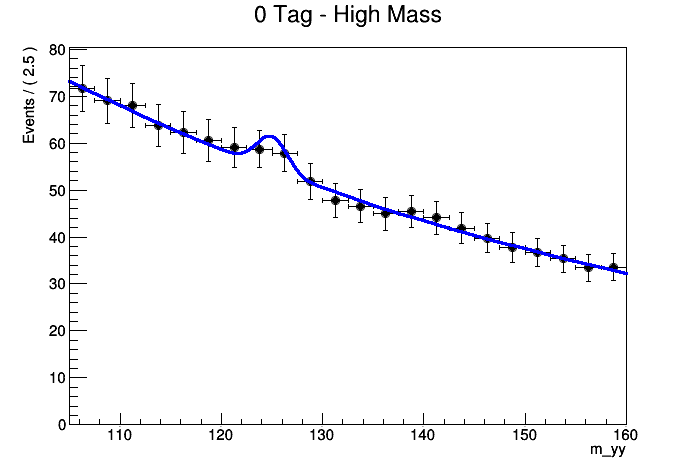

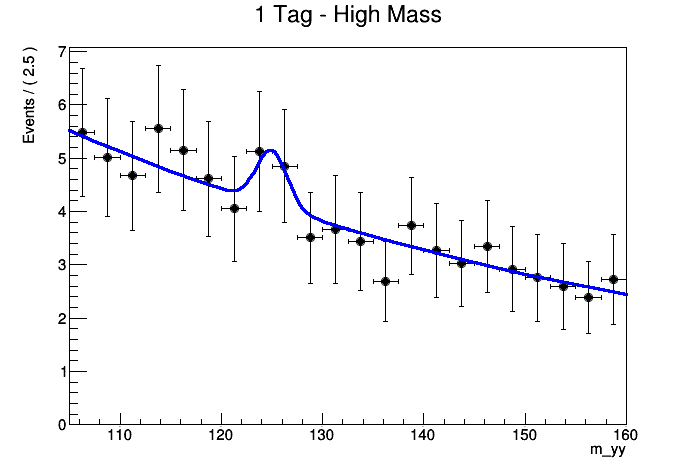

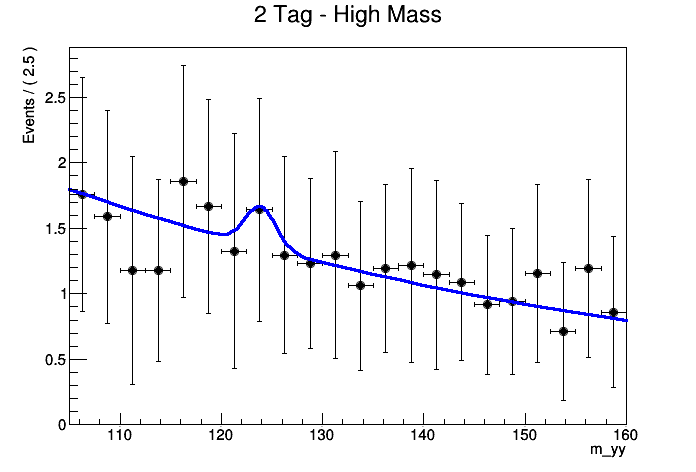

In [69]:
# c1 = ROOT.TCanvas()
# plot1 = myy.frame(ROOT.RooFit.Title("0 Tag - Low Mass"))
# data_combo.plotOn(plot1,ROOT.RooFit.Cut("cat==cat::tag0low"))
# w.pdf("jointmodel").plotOn(plot1, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag0low"))
# plot1.Draw()
# c1.Draw()

c2 = ROOT.TCanvas()
plot2 = myy.frame(ROOT.RooFit.Title("0 Tag - High Mass"))
highmass_data.plotOn(plot2,ROOT.RooFit.Cut("highmasscats==highmasscats::tag0"))
w.pdf("constrained_jointmodel").plotOn(
    plot2, ROOT.RooFit.ProjWData(highmass_data),
    ROOT.RooFit.Slice(w.cat("highmasscats"),"tag0"))
plot2.Draw()
c2.Draw()

# c3 = ROOT.TCanvas()
# plot3 = myy.frame(ROOT.RooFit.Title("1 Tag - Low Mass"))
# data_combo.plotOn(plot3,ROOT.RooFit.Cut("cat==cat::tag1low"))
# w.pdf("jointmodel").plotOn(plot3, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag1low"))
# plot3.Draw()
# c3.Draw()

c4 = ROOT.TCanvas()
plot4 = myy.frame(ROOT.RooFit.Title("1 Tag - High Mass"))
highmass_data.plotOn(plot4,ROOT.RooFit.Cut("highmasscats==highmasscats::tag1"))
w.pdf("constrained_jointmodel").plotOn(
    plot4, ROOT.RooFit.ProjWData(highmass_data),
    ROOT.RooFit.Slice(w.cat("highmasscats"),"tag1"))
plot4.Draw()
c4.Draw()

# c5 = ROOT.TCanvas()
# plot5 = myy.frame(ROOT.RooFit.Title("2 Tag - Low Mass"))
# data_combo.plotOn(plot5,ROOT.RooFit.Cut("cat==cat::tag2low"))
# w.pdf("jointmodel").plotOn(plot5, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag2low"))
# plot5.Draw()
# c5.Draw()

c6 = ROOT.TCanvas()
plot6 = myy.frame(ROOT.RooFit.Title("2 Tag - High Mass"))
highmass_data.plotOn(plot6,ROOT.RooFit.Cut("highmasscats==highmasscats::tag2"))
w.pdf("constrained_jointmodel").plotOn(
    plot6, ROOT.RooFit.ProjWData(highmass_data),
    ROOT.RooFit.Slice(w.cat("highmasscats"),"tag2"))
plot6.Draw()
c6.Draw()

Okay whatever, we don't actually expect these fits to work without setting realistic expectations for the number of events, the boundaries on the resolution parameter etc.

In [70]:
import ROOT.RooStats as rs

In [71]:
mconfig = rs.ModelConfig(w)
mconfig.SetPdf(w.pdf("constrained_jointmodel"))
mconfig.SetParametersOfInterest(ROOT.RooArgSet(w.var("mu_2H")))
mconfig.SetObservables(ROOT.RooArgSet(w.var("myy")))
mconfig.SetNuisanceParameters(ROOT.RooArgSet(w.var("theta_yield"), w.var("EG_RES"), w.var("EG_SCALE"),
                                             w.var("n_highMass_2tag_di_Higgs_bias"),  #w.var("n_bias_tag2low_2H"),
                                            w.var("n_highMass_1tag_di_Higgs_bias") #, w.var("n_bias_tag1low_2H")
                                            ))
mconfig.SetGlobalObservables(ROOT.RooArgSet(w.var("theta_yield_global"), w.var("EG_SCALE_global"), w.var("EG_RES_global"),
                                            w.var("n_highMass_2tag_di_Higgs_bias_global"), # w.var("n_bias_tag2low_2H_global"),
                                            w.var("n_highMass_1tag_di_Higgs_bias_global")#,  w.var("n_bias_tag1low_2H_global")
                                           ))
# mconfig.SetNuisanceParameters(ROOT.RooArgSet(w.var("theta_yield"), w.var("EG_RES"), w.var("EG_SCALE"),
#                                              w.var("n_bias_tag2high_2H"),
#                                             w.var("n_bias_tag1high_2H")))
# mconfig.SetGlobalObservables(ROOT.RooArgSet(w.var("theta_yield_global"), w.var("EG_SCALE_global"), w.var("EG_RES_global"),
#                                             w.var("n_bias_tag2high_2H_global"),
#                                             w.var("n_bias_tag1high_2H_global")
#                                            ))

In [72]:
mconfig.SetName('model')
mconfig.Print()


=== Using the following for model ===
Observables:             RooArgSet:: = (myy)
Parameters of Interest:  RooArgSet:: = (mu_2H)
Nuisance Parameters:     RooArgSet:: = (theta_yield,EG_RES,EG_SCALE,n_highMass_2tag_di_Higgs_bias,n_highMass_1tag_di_Higgs_bias)
Global Observables:      RooArgSet:: = (theta_yield_global,EG_SCALE_global,EG_RES_global,n_highMass_2tag_di_Higgs_bias_global,n_highMass_1tag_di_Higgs_bias_global)
PDF:                     RooProdPdf::constrained_jointmodel[ jointmodel * EG_SCALE_gaussian * EG_RES_gaussian * theta_yield_gaussian ] = 0.00804255



In [75]:
sb_model = mconfig
poi = sb_model.GetParametersOfInterest().first()
sb_model.SetSnapshot(ROOT.RooArgSet(poi))
b_model = sb_model.Clone()
b_model.SetName(sb_model.GetName()+"_with_poi_0")
oldval = poi.getVal()
poi.setVal(0)
b_model.SetSnapshot(ROOT.RooArgSet(poi))
poi.setVal(oldval)

In [76]:
ac = rs.AsymptoticCalculator(highmass_data, b_model, sb_model)
ac.SetOneSided(True)

[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize....
[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize - Find  best unconditional NLL on observed data
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **   13 **SET PRINT           0
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 EG_RES       2.54608e-02  1.11626e+00   -1.00000e+01  1.00000e+01
     2 EG_SCALE    -1.77933e-02  1.33245e-02   -1.00000e+01  1.00000e+01
     3 mu_2H        2.11975e-03  2.00319e+00    0.00000e+00  2.00000e+01
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSIDE LIMITS.
     4 n_highMass_1tag_di_Higgs_bias   9.50640e-03  7.85397e-01   -1.00000e+02  1.00000e+02
     5 n_highMass_2tag_di_Higgs_bias  -2.25964e-02  1.00347e+00   -1.00000e+02  1.00000e+02
     6 theta_yield  -8.07127e-03  1.00944e+00   -1.00000e+01  1.00000e+

In [77]:
results = ac.GetHypoTest()


[#1] INFO:Eval -- AsymptoticCalculator::GetHypoTest: - perform  an hypothesis test for  POI ( mu_2H ) = 0.00211975
[#0] PROGRESS:Eval -- AsymptoticCalculator::GetHypoTest -  Find  best conditional NLL on OBSERVED data set ..... 
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **   13 **SET PRINT           0
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 EG_RES       2.78863e-02  1.03401e+00   -1.00000e+01  1.00000e+01
     2 EG_SCALE    -1.75633e-02  1.00838e-01   -1.00000e+01  1.00000e+01
     3 n_highMass_1tag_di_Higgs_bias   1.07253e-02  7.78131e-01   -1.00000e+02  1.00000e+02
     4 n_highMass_2tag_di_Higgs_bias  -2.30431e-02  7.42143e-01   -1.00000e+02  1.00000e+02
     5 theta_yield  -8.56473e-03  9.97452e-01   -1.00000e+01  1.00000e+01
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PR

In [81]:
print results.NullPValue(), results.AlternatePValue()

0.498247150061 0.50927035461


In [82]:
calc = rs.HypoTestInverter(ac)
calc.SetConfidenceLevel(0.95)
calc.UseCLs(True)

[#1] INFO:InputArguments -- HypoTestInverter ---- Input models: 
		 using as S+B (null) model     : model
		 using as B (alternate) model  : model_with_poi_0



In [83]:
calc.SetFixedScan(8, poi.getMin(), poi.getMax())

In [84]:
r = calc.GetInterval()

[#1] INFO:Eval -- HypoTestInverter::GetInterval - run a fixed scan
[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(w) replacing previous snapshot with name model__snapshot

[#1] INFO:Eval -- AsymptoticCalculator::GetHypoTest: - perform  an hypothesis test for  POI ( mu_2H ) = 0
[#0] PROGRESS:Eval -- AsymptoticCalculator::GetHypoTest -  Find  best conditional NLL on OBSERVED data set ..... 
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **   25 **SET PRINT           0
 **********
 **********
 **   26 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 EG_RES       2.78863e-02  1.03401e+00   -1.00000e+01  1.00000e+01
     2 EG_SCALE    -1.75633e-02  1.00838e-01   -1.00000e+01  1.00000e+01
     3 n_highMass_1tag_di_Higgs_bias   1.07253e-02  7.78131e-01   -1.00000e+02  1.00000e+02
     4 n_highMass_2tag_di_Higgs_bias  -2.30431e-02  7.42143e-01   -1.00000e+02  1

In [85]:
print r.UpperLimit()
print r.UpperLimitEstimatedError()

20.0
0.0


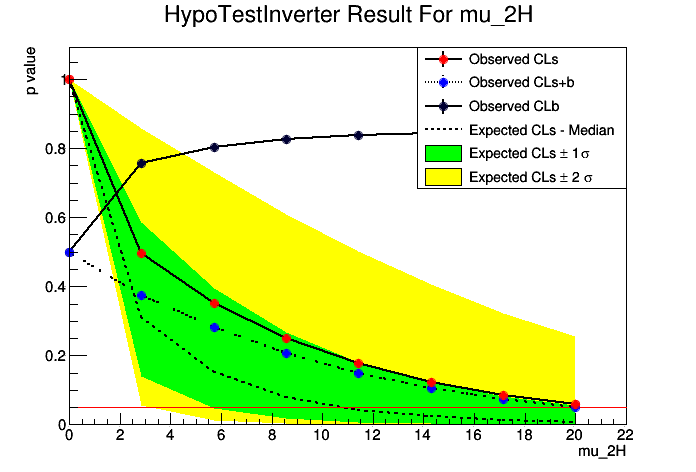

In [87]:
c = ROOT.TCanvas()
plot = rs.HypoTestInverterPlot(r)
plot.Draw("CLb 2CL")
c.Draw()

Note to self: actually read this (https://root.cern.ch/root/html/tutorials/roostats/StandardHypoTestDemo.C.html) and try to understand what's going on!! Though I don't know if that's relevant. WHat I'm doing can be found here: https://twiki.cern.ch/twiki/bin/view/RooStats/RooStatsTutorialsAugust2012 and here: https://www.pp.rhul.ac.uk/~cowan/stat/roostats/SimpleCLs/SimpleCLs.C

Andrew inverts this plot using this: https://github.com/rasumovsky/56_Hbbyy/blob/c83d975caf3f2cecb68cd470ad57b6292409573c/src/DHPlotCLvsMX.cxx

In [111]:
# if you set the confidence interval above to 0.683, then the red line moves up

# Ignore Below

$$\text{PDF}_{0tag,lowmass} = [\color{red}{n_{noH,0tag,lowmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,lowmass},a_{1,lowmass},a_{2,lowmass}) + \mu_{1H}\cdot \color{red}{n_{1H,0tag,
}}(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};\color{red}{m_{0,0tag,lowmass}}(\theta_A),\color{red}{\sigma_{0,0tag,lowmass}}(\theta_B),\alpha_\text{low, lowmass},\alpha_\text{high, lowmass}, n_\text{low, lowmass}, n_\text{high, lowmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{1tag,lowmass} = [\color{red}{n_{noH,1tag,lowmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,lowmass},a_{1,lowmass},a_{2,lowmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,1tag,lowmass}}+\mu_{2H}\cdot \color{red}{n_{2H,1tag,lowmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};\color{red}{m_{0,1tag,lowmass}}(\theta_A),\color{red}{\sigma_{0,1tag,lowmass}}(\theta_B),\alpha_\text{low, lowmass},\alpha_\text{high, lowmass}, n_\text{low, lowmass}, n_\text{high, lowmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{2tag,lowmass} = [\color{red}{n_{noH,2tag,lowmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,lowmass},a_{1,lowmass},a_{2,lowmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,2tag,lowmass}}+\mu_{2H}\cdot \color{red}{n_{2H,2tag,lowmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};\color{red}{m_{0,2tag,lowmass}}(\theta_A),\color{red}{\sigma_{0,2tag,lowmass}}(\theta_B),\alpha_\text{low, lowmass},\alpha_\text{high, lowmass}, n_\text{low, lowmass}, n_\text{high, lowmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{0tag,highmass} = [\color{red}{n_{noH,0tag,highmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,highmass},a_{1,highmass},a_{2,highmass}) + \mu_{1H}\cdot \color{red}{n_{1H,0tag,highmass}}(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};m_0(\theta_A),\sigma_0(\theta_B),\alpha_\text{low,highmass},\alpha_\text{high,highmass}, n_\text{low,highmass}, n_\text{high,highmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{1tag,highmass} = [\color{red}{n_{noH,1tag,highmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,highmass},a_{1,highmass},a_{2,highmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,1tag,highmass}}+\mu_{2H}\cdot \color{red}{n_{2H,1tag,highmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};m_0(\theta_A),\sigma_0(\theta_B),\alpha_\text{low,highmass},\alpha_\text{high,highmass}, n_\text{low,highmass}, n_\text{high,highmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{2tag,highmass} = [\color{red}{n_{noH,2tag,highmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,highmass},a_{1,highmass},a_{2,highmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,2tag,highmass}}+\mu_{2H}\cdot \color{red}{n_{2H,2tag,highmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};m_0(\theta_A),\sigma_0(\theta_B),\alpha_\text{low,highmass},\alpha_\text{high,highmass}, n_\text{low,highmass}, n_\text{high,highmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$